# THE SPARKS FOUNDATION GRIP TASK - 3

## AUTHOR: MALLIKA ADAK

### DATA SCIENCE AND BUSINESS ANALYTICS INTERNSHIP, JULY - 2021

#### TASK -3: EXPLORATORY DATA ANALYSIS - RETAIL

OBJECTIVE: To find out the state and city which has the maximum profit. Also, to examine the region of maximum sale and various other insights.

DATASET: https://bit.ly/3i4rbWl

### 1) Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### 2) Reading the Data from the Source

In [2]:
dataset = pd.read_csv("D:\MALLIKA\SampleSuperstore.csv")
print("Data set imported successfully")

dataset.head()

Data set imported successfully


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 3) Familiarizing with Data

In [3]:
#Shape of dataframe
dataset.shape

(9994, 13)

In [4]:
# Determining the different columns in the dataset
dataset.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
#Information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
#checking for null value
dataset.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Describing the dataset by various parameters
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
# checking for duplicate values
dataset.duplicated().sum()

17

In [9]:
# dropping the duplicates
dataset.drop_duplicates()
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
#removing the unnecessary columns like postal code
dataset = dataset.drop(['Postal Code'],axis=1)
dataset.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
# Evaluating correlation coefficient 
dataset.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


### 4) Visualization of data

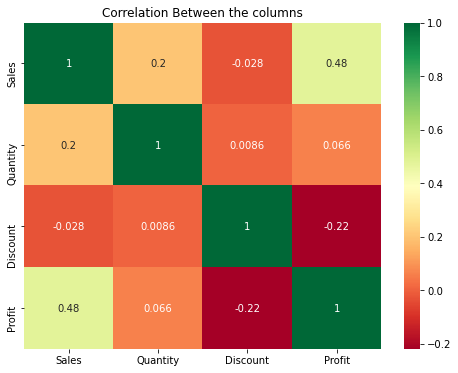

In [12]:
# finding the pairwise correlations between the columns and visualising using heatmaps
fig=plt.figure(figsize=(8,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Between the columns')
plt.show()

#### From above Heatmap:

1) Sales and Profit are Moderately Correlated. <br> 2) Discount and Profit are Negatively Correlated <br> 3) Quantity and Profit are less Moderately Correlated.

#### Analysis using Pairplot Visualization of each column

**1) Based on Category**

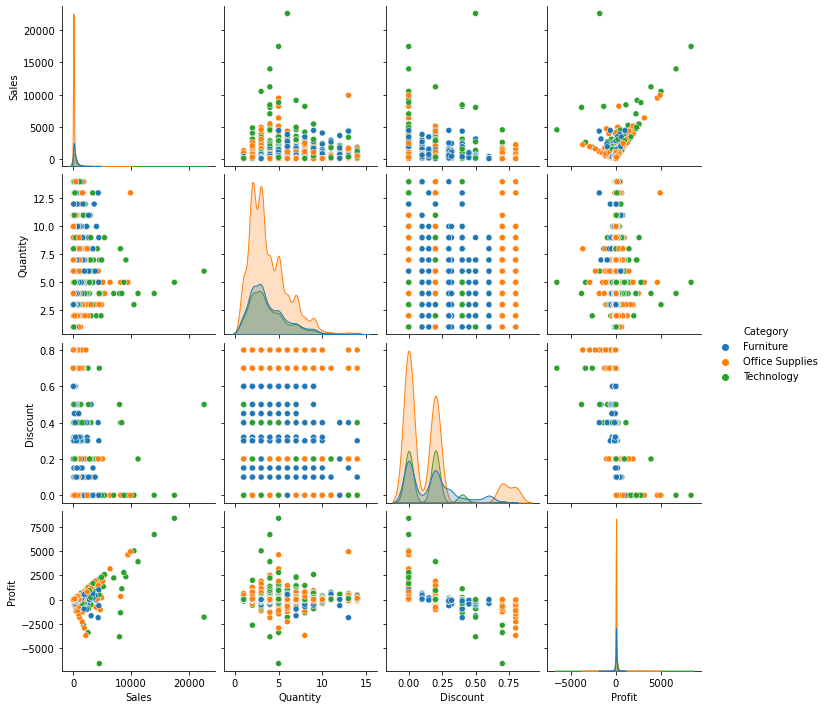

In [13]:
sns.pairplot(dataset,hue='Category');

**2) Based on Region**

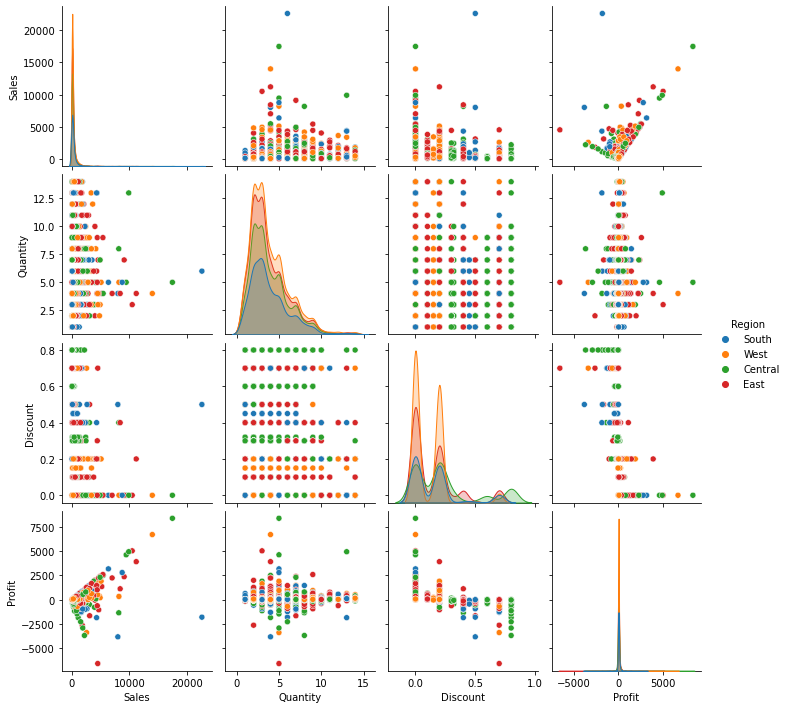

In [14]:
sns.pairplot(dataset,hue='Region');

**3) Based on Segment**

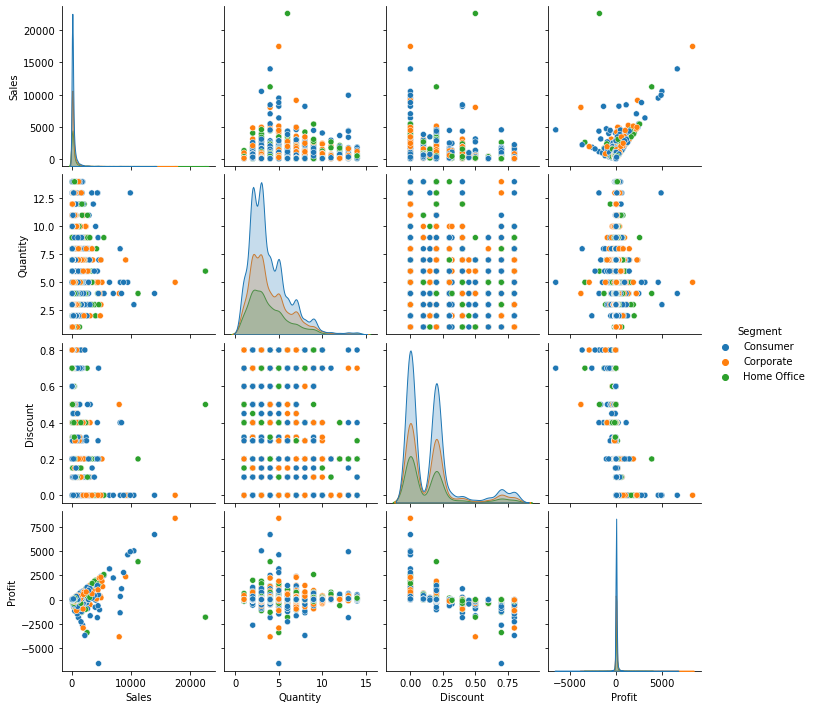

In [15]:
sns.pairplot(dataset,hue='Segment');

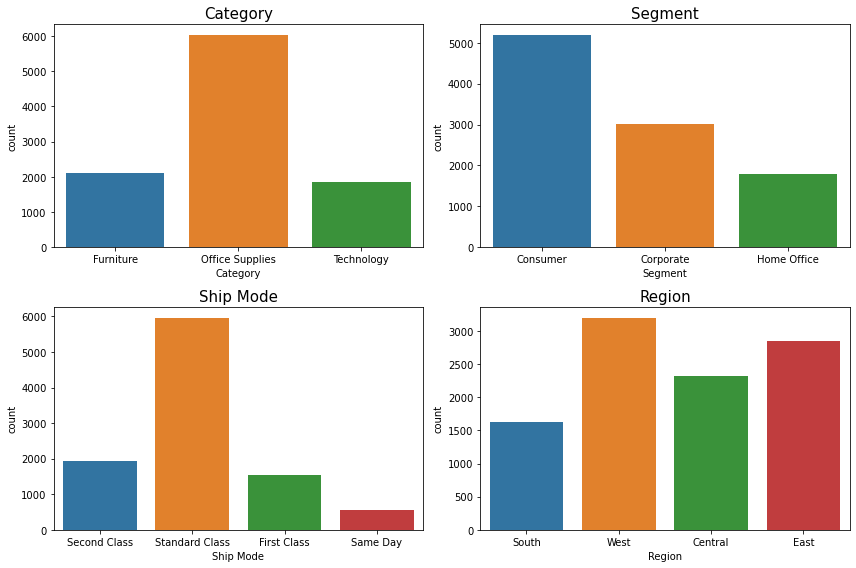

In [16]:
fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(12,8));

sns.countplot(dataset['Category'],ax=axs[0][0])
sns.countplot(dataset['Segment'],ax=axs[0][1])
sns.countplot(dataset['Ship Mode'],ax=axs[1][0])
sns.countplot(dataset['Region'],ax=axs[1][1])
axs[0][0].set_title('Category',fontsize=15)
axs[0][1].set_title('Segment',fontsize=15)
axs[1][0].set_title('Ship Mode',fontsize=15)
axs[1][1].set_title('Region',fontsize=15)


plt.tight_layout()

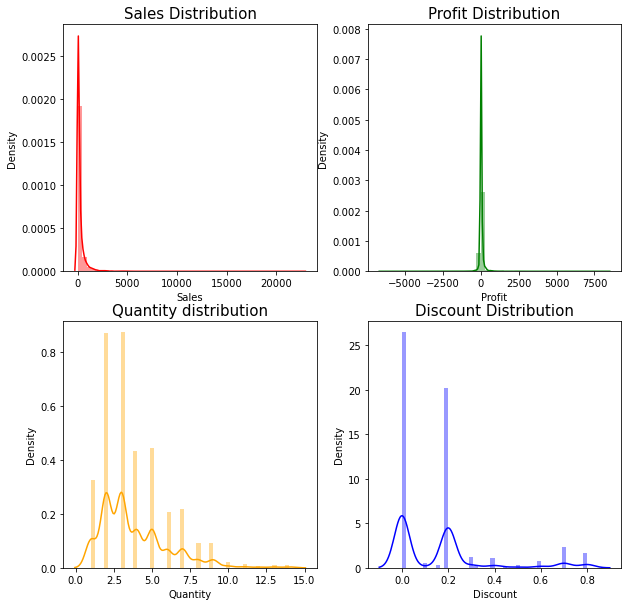

In [17]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (10,10))

sns.distplot(dataset['Sales'], color = 'red',  ax = axs[0][0])
sns.distplot(dataset['Profit'], color = 'green',  ax = axs[0][1])
sns.distplot(dataset['Quantity'], color = 'orange',  ax = axs[1][0])
sns.distplot(dataset['Discount'], color = 'blue',  ax = axs[1][1])
axs[0][0].set_title('Sales Distribution', fontsize = 15)
axs[0][1].set_title('Profit Distribution', fontsize = 15)
axs[1][0].set_title('Quantity distribution', fontsize = 15)
axs[1][1].set_title('Discount Distribution', fontsize = 15)
plt.show()

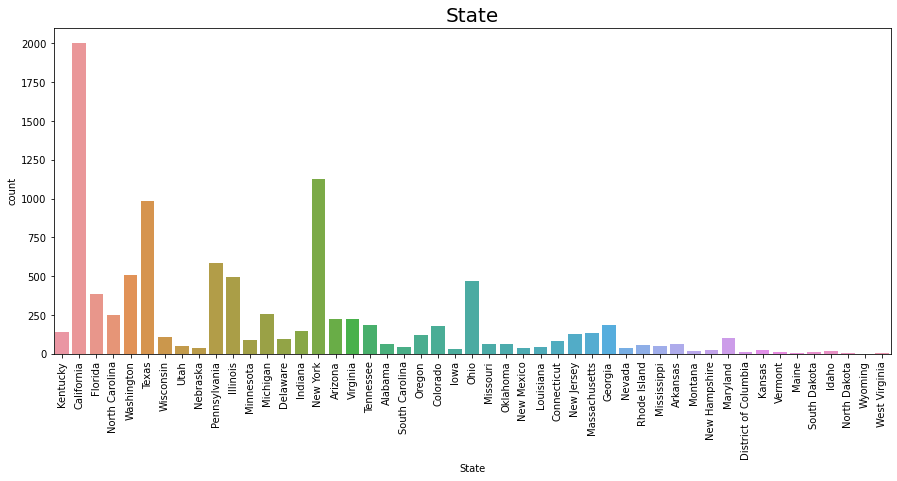

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(dataset['State'])
plt.xticks(rotation=90)
plt.title("State",fontsize=20)
plt.show()

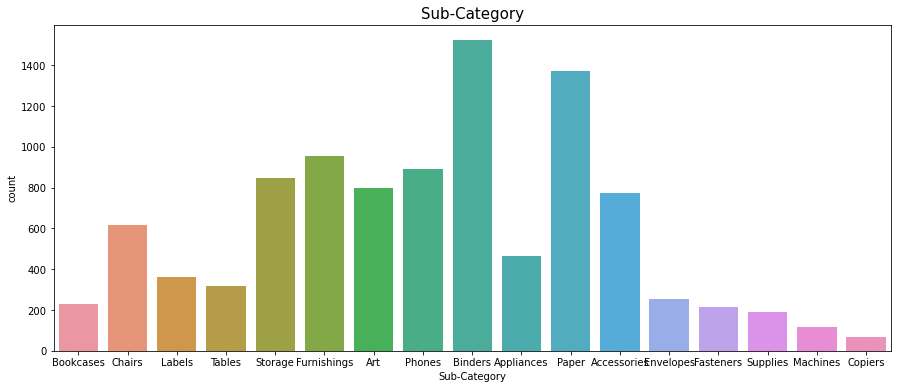

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(dataset['Sub-Category'])
plt.title("Sub-Category",fontsize=15)
plt.show()

### 5) Exploratory Data Analysis

#### 5.1 State wise Deal Analysis

In [20]:
dataState=dataset['State'].value_counts()
dataState.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

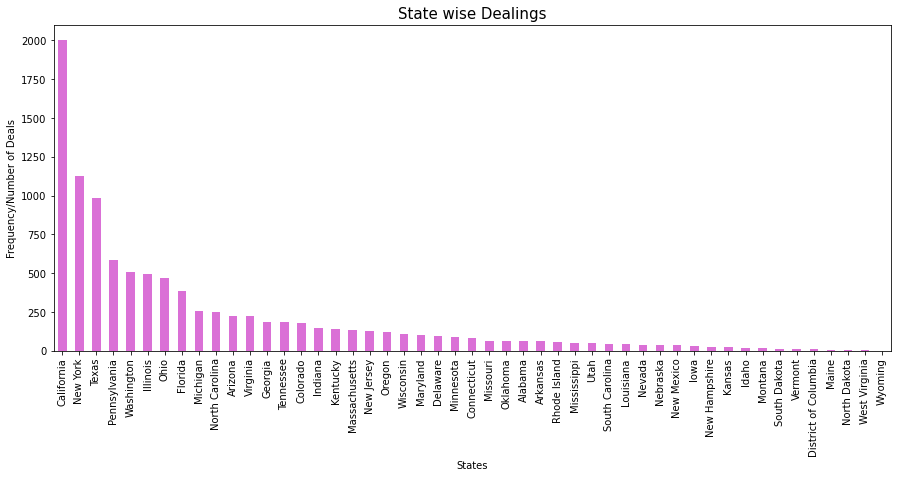

In [21]:
dataState.plot(kind='bar',figsize=(15,6),color='orchid')
plt.ylabel("Frequency/Number of Deals")
plt.xlabel("States")
plt.title("State wise Dealings",fontsize=15)
plt.show()

**The Top 3 states where deals are Highest are:**

1. Califonia
2. New York
3. Texas

However, the lowest number of deal are in Wyoming

In [22]:
print("The average number of deals per state is {}".format(round(dataState.mean())))

The average number of deals per state is 204


In [23]:
datastate = dataset.groupby(['State'])[['Sales','Discount','Profit']].mean()
datastate.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


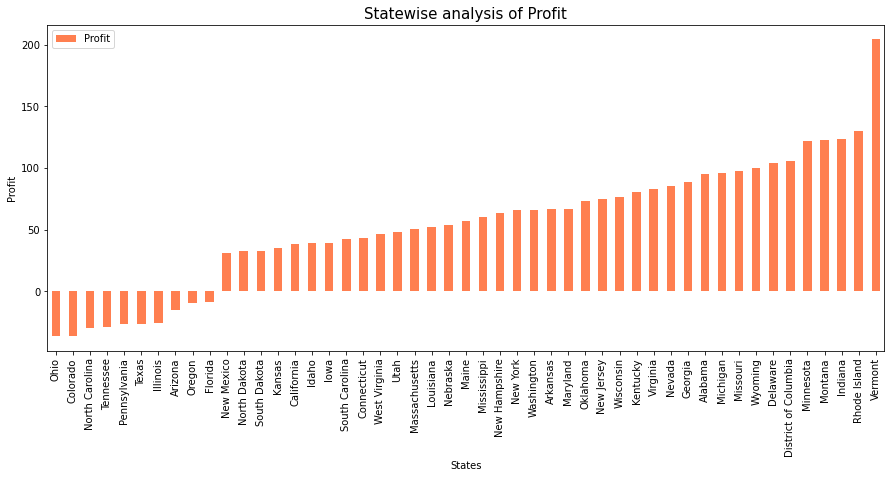

In [24]:
data_state = datastate.sort_values('Profit')
data_state[['Profit']].plot(kind='bar',figsize=(15,6),color='coral')
plt.ylabel('Profit')
plt.xlabel('States')
plt.title('Statewise analysis of Profit',fontsize=15)
plt.show()

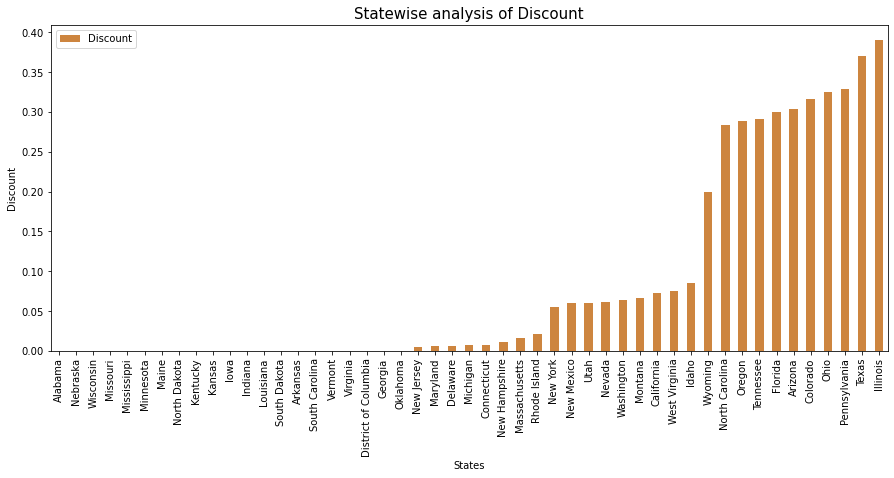

In [25]:
data_state = datastate.sort_values('Discount')
data_state[['Discount']].plot(kind='bar',figsize=(15,6),color='peru')
plt.ylabel('Discount')
plt.xlabel('States')
plt.title('Statewise analysis of Discount',fontsize=15)
plt.show()

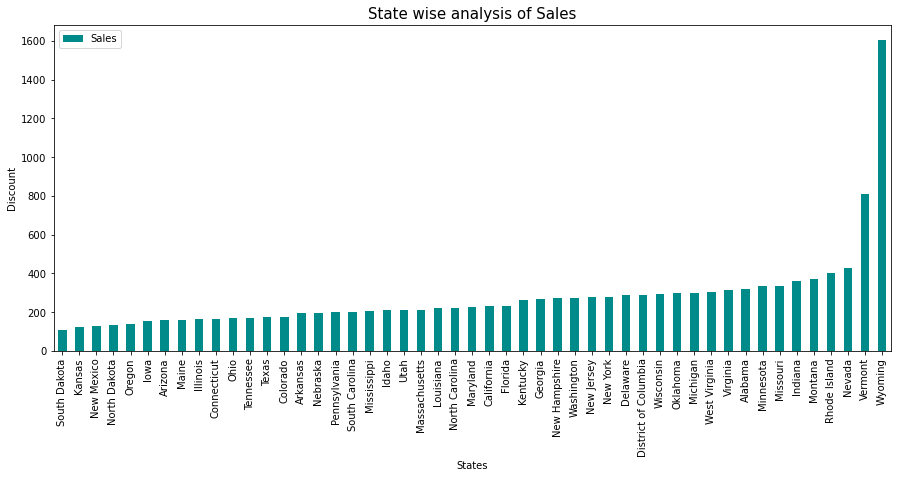

In [26]:
data_state = datastate.sort_values('Sales')
data_state[['Sales']].plot(kind='bar',figsize=(15,6),color='darkcyan')
plt.ylabel('Discount')
plt.xlabel('States')
plt.title('State wise analysis of Sales',fontsize=15)
plt.show()

### 5.2 City wise analysis

In [27]:
dataCity=dataset["City"].value_counts()
dataCity.head(10)

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Houston          377
Chicago          314
Columbus         222
San Diego        170
Springfield      163
Name: City, dtype: int64

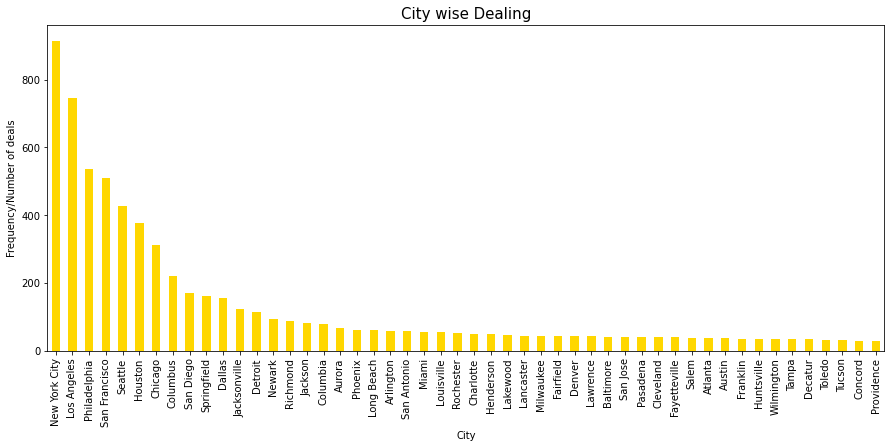

In [28]:
dataCity.head(50).plot(kind='bar',figsize=(15,6),color='gold')
plt.xlabel("City")
plt.ylabel("Frequency/Number of deals")
plt.title("City wise Dealing",fontsize=15)
plt.show()

**The Top 3 cities where deals are Highest are:**

1. New York City
2. Los Angeles
3. Philadelphia

In [29]:
print("The average number of deals per City is {}".format(round(dataCity.mean())))

The average number of deals per City is 19


In [30]:
dataCity = dataset.groupby(['City'])[['Sales','Discount','Profit']].mean()
dataCity = dataCity.sort_values('Profit')
dataCity.head(10)

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052
Clarksville,316.818571,0.271429,-150.764743
Medina,275.302444,0.433333,-149.227178
Burlington,866.723280,0.136000,-144.915088
San Antonio,370.229288,0.383051,-123.712715


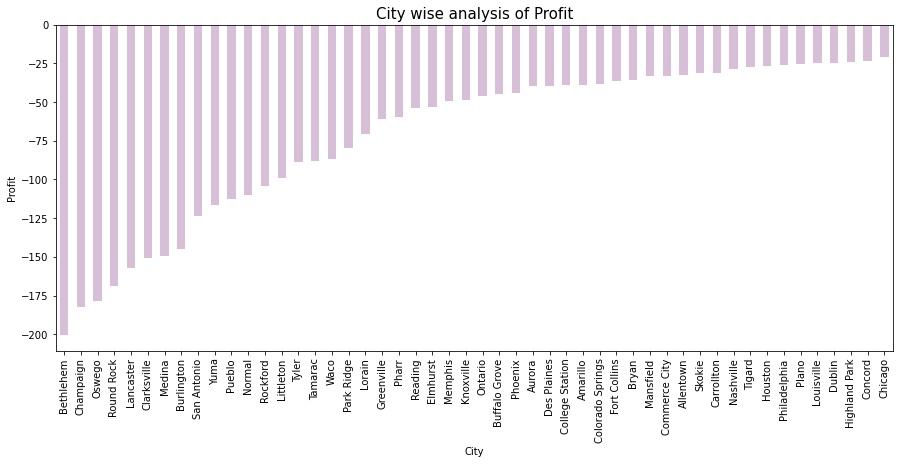

In [31]:
dataCity['Profit'].head(50).plot(kind='bar',figsize=(15,6),color='thistle')
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('City wise analysis of Profit',fontsize=15)
plt.show()

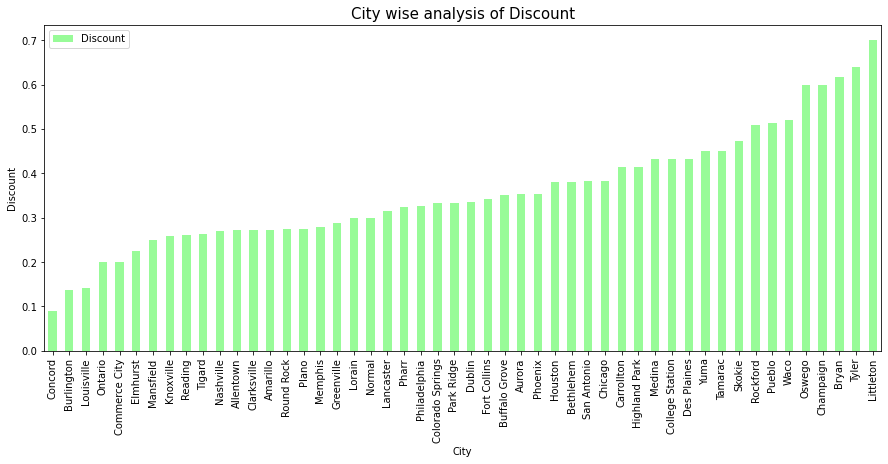

In [32]:
datacity = dataCity.head(50).sort_values('Discount')
datacity[['Discount']].plot(kind='bar',figsize=(15,6),color='palegreen')
plt.xlabel('City')
plt.ylabel('Discount')
plt.title('City wise analysis of Discount',fontsize=15)
plt.show()

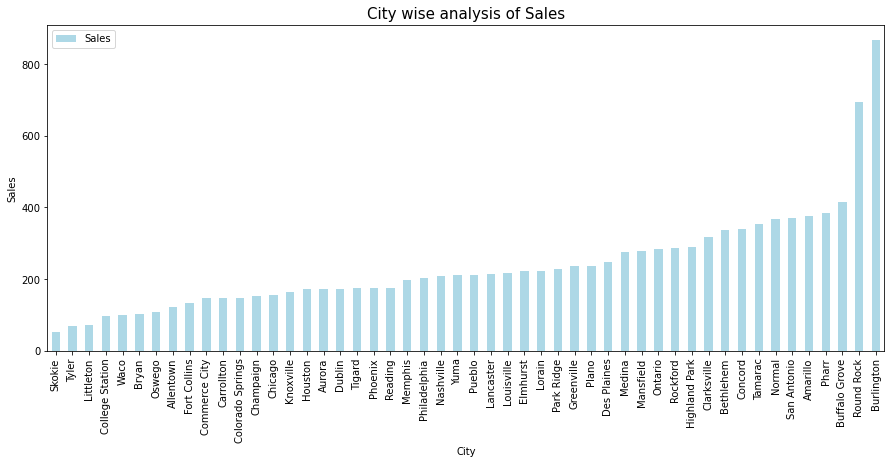

In [33]:
datacity=dataCity.head(50).sort_values('Sales')
datacity[['Sales']].plot(kind='bar',figsize=(15,6),color='lightblue')
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('City wise analysis of Sales',fontsize=15)
plt.show()

### 5.3 Quantity wise analysis

In [34]:
dataQuantity=dataset.groupby(['Quantity'])[['Sales','Profit','Discount']].mean()
dataQuantity

,Sales,Profit,Discount
Quantity,,,
1,59.234632,8.276396,0.152959
2,120.354488,16.006831,0.154858
3,175.201578,23.667715,0.153329
4,271.764059,37.131310,0.157708
5,337.936339,40.257394,0.157146
6,362.101960,18.051517,0.166556
7,395.888393,56.579163,0.161980
8,458.210802,42.244342,0.171595
9,498.083683,68.557716,0.147946


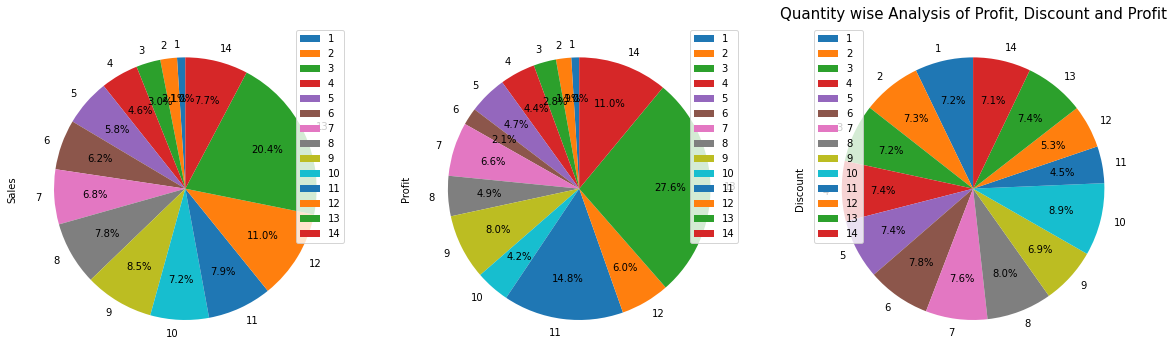

In [35]:
#Pie Chart 1)Sales 2)Discount 3)Profit
dataQuantity.plot.pie(subplots=True,figsize=(20,18),autopct='%1.1f%%',pctdistance=0.69,startangle=90,labels=dataQuantity.index)
plt.title('Quantity wise Analysis of Profit, Discount and Profit',fontsize=15)
plt.show()

**Hence, 13 is the number of Quantity which has the highest Sales and Profit.**

### 5.4 Segment wise Analysis

In [36]:
datasegment = dataset['Segment'].value_counts().sort_index()
datasegment

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

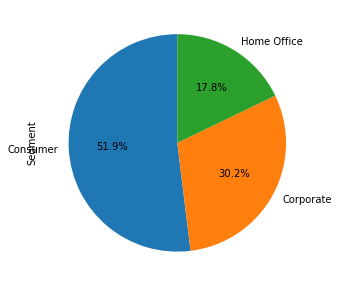

In [37]:
datasegment.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(5,5),startangle=90)
plt.show()

In [38]:
dataSegment= dataset.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
dataSegment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


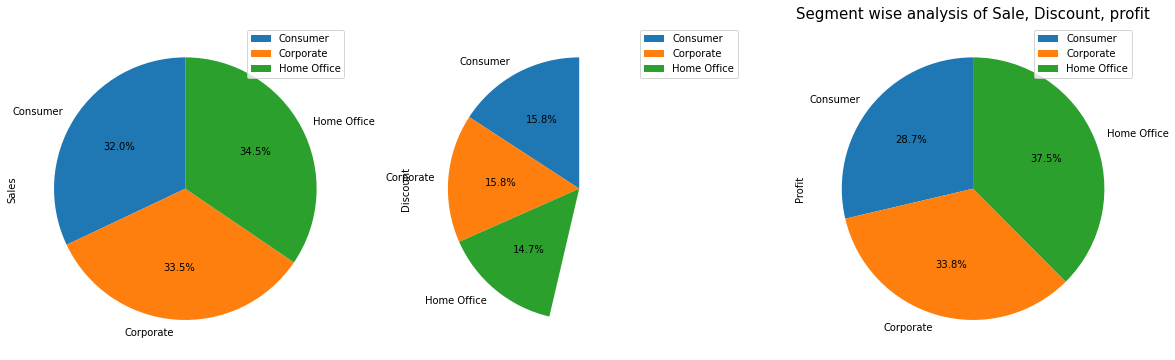

In [39]:
dataSegment.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',startangle=90)
plt.title('Segment wise analysis of Sale, Discount, profit', fontsize=15)
plt.show()

### 5.5 Region wise Analysis

In [40]:
dataregion = dataset['Region'].value_counts().sort_index()
dataregion

Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

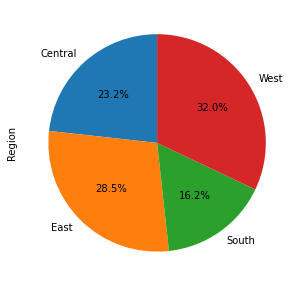

In [41]:
dataregion.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(5,5),startangle=90)
plt.show()

In [42]:
dataRegion=dataset.groupby(['Region'])[['Sales','Profit','Discount']].mean()
dataRegion

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


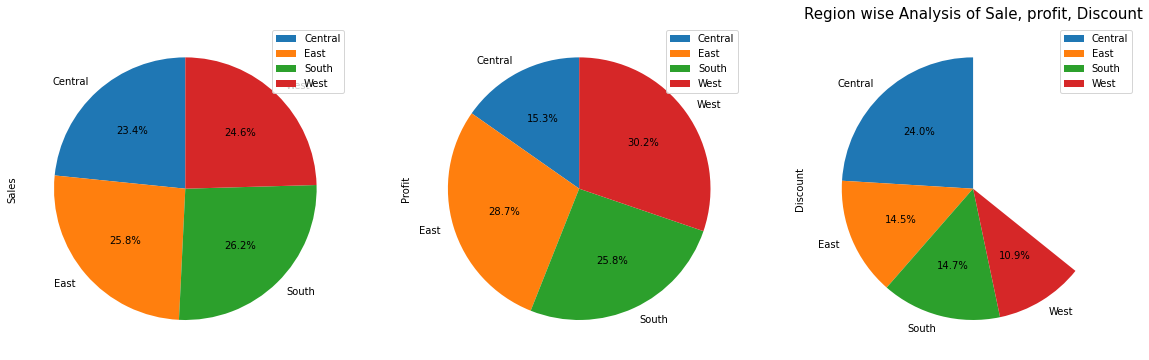

In [43]:
dataRegion.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(20,20),startangle=90)
plt.title('Region wise Analysis of Sale, profit, Discount', fontsize=15)
plt.show()

**Hence, West region has the Maximum Profit.**

### 5.6 Ship mode wise Analysis 

In [44]:
dataship = dataset['Ship Mode'].value_counts().sort_index()
dataship

First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

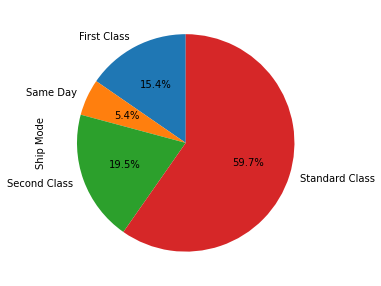

In [45]:
dataship.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(5,5),startangle=90)
plt.show()

In [46]:
dataShip=dataset.groupby(['Ship Mode'])[['Sales','Profit','Discount']].mean()
dataShip

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


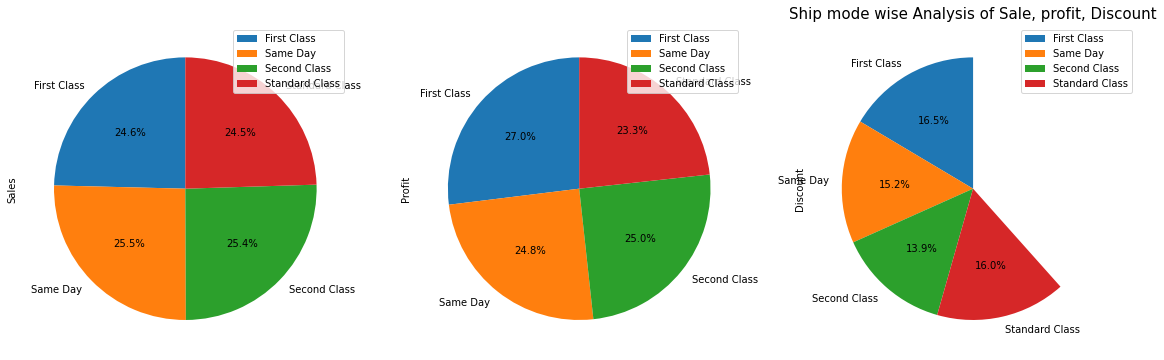

In [47]:
dataShip.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',startangle=90)
plt.title('Ship mode wise Analysis of Sale, profit, Discount', fontsize=15)
plt.show()

### 5.7 Category wise Analysis

In [48]:
datacategory = dataset['Category'].value_counts().sort_values()
datacategory

Technology         1847
Furniture          2121
Office Supplies    6026
Name: Category, dtype: int64

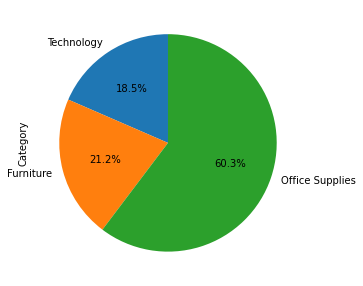

In [49]:
datacategory.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(5,5),startangle=90)
plt.show()

In [50]:
dataCategory = dataset.groupby(['Category'])[['Sales','Discount','Profit']].mean()
dataCategory

,Sales,Discount,Profit
Category,,,
Furniture,349.834887,0.173923,8.699327
Office Supplies,119.324101,0.157285,20.327050
Technology,452.709276,0.132323,78.752002


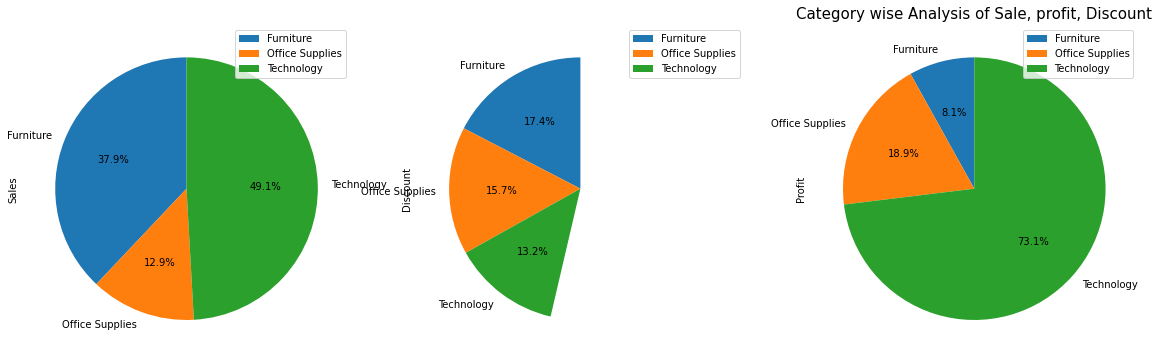

In [51]:
dataCategory.plot.pie(subplots=True,figsize=(20,20), autopct='%1.1f%%',startangle=90)
plt.title('Category wise Analysis of Sale, profit, Discount', fontsize=15)
plt.show()

### Sub-Category wise Analysis

In [52]:
datasub = dataset['Sub-Category'].value_counts().sort_values()
datasub

Copiers          68
Machines        115
Supplies        190
Fasteners       217
Bookcases       228
Envelopes       254
Tables          319
Labels          364
Appliances      466
Chairs          617
Accessories     775
Art             796
Storage         846
Phones          889
Furnishings     957
Paper          1370
Binders        1523
Name: Sub-Category, dtype: int64

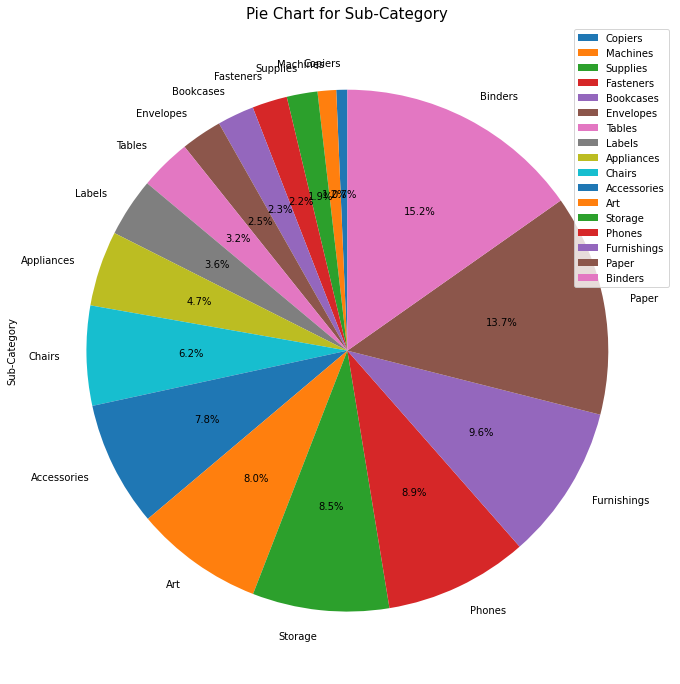

In [53]:
datasub.plot.pie(subplots=True,autopct='%1.1f%%',figsize=(12,12),startangle=90)
plt.title('Pie Chart for Sub-Category',fontsize=15)
plt.legend()
plt.show()

In [54]:
dataSub=dataset.groupby(['Sub-Category'])[['Sales','Profit','Discount']].mean()
dataSub

,Sales,Profit,Discount
Sub-Category,,,
Accessories,215.974604,54.111788,0.078452
Appliances,230.755710,38.922758,0.166524
Art,34.068834,8.200737,0.074874
Binders,133.560560,19.843574,0.372292
Bookcases,503.859633,-15.230509,0.211140
Chairs,532.332420,43.095894,0.170178
Copiers,2198.941618,817.909190,0.161765
Envelopes,64.867724,27.418019,0.080315
Fasteners,13.936774,4.375660,0.082028


*Highest Sales= Copier <br> *Second Highest= Machines

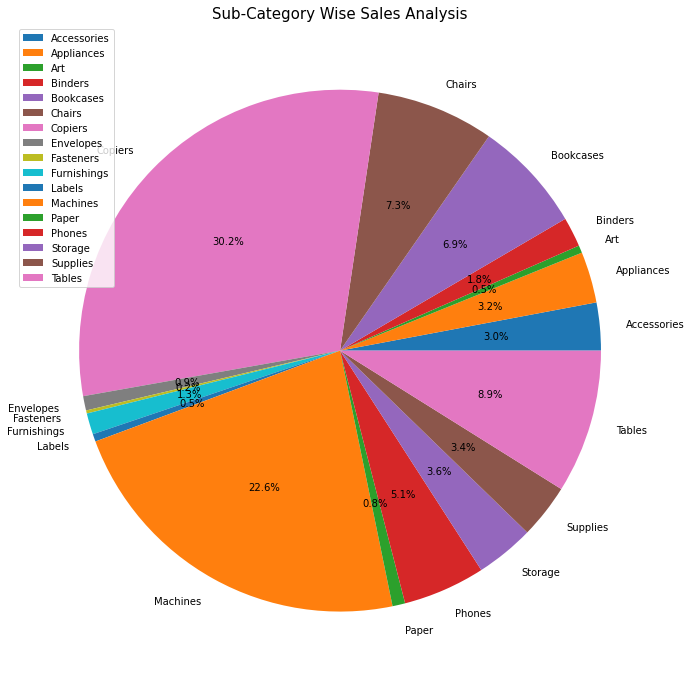

In [55]:
plt.figure(figsize = (12,12))
plt.pie(dataSub['Sales'], labels = dataSub.index, autopct = '%1.1f%%')
plt.title('Sub-Category Wise Sales Analysis', fontsize = 15)
plt.legend()
plt.xticks(rotation = 90)
plt.show()

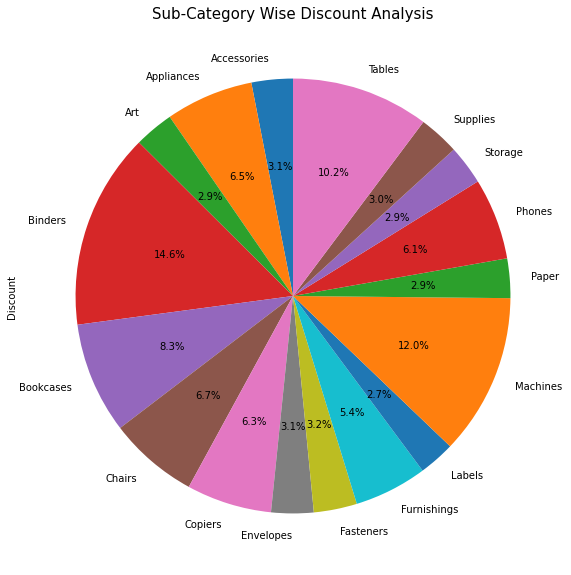

In [56]:
dataSub['Discount'].plot.pie(figsize=(10,10),autopct='%1.1f%%',subplots=True,startangle=90)
plt.title('Sub-Category Wise Discount Analysis', fontsize = 15)
plt.show()

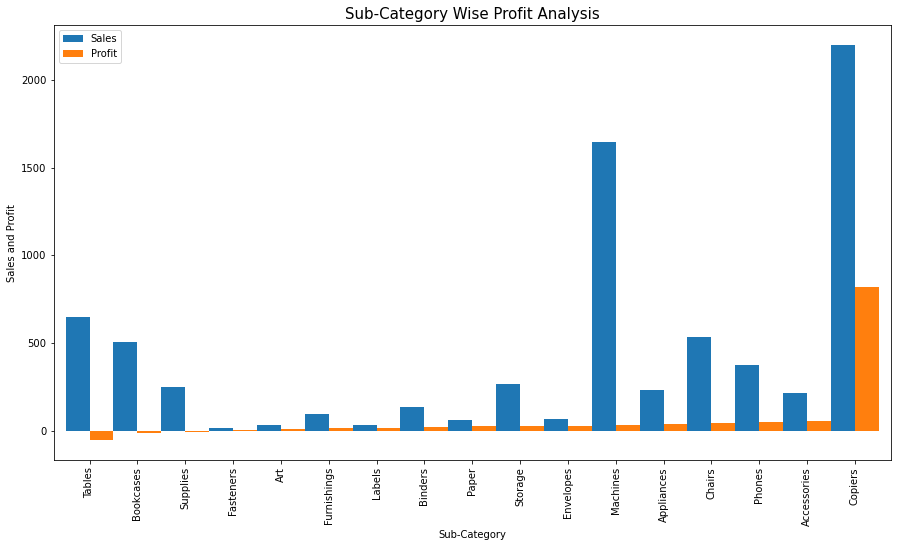

In [57]:
dataSub.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize=(15,8),width=1,label=['average sales price','profit'])
plt.xlabel('Sub-Category')
plt.ylabel('Sales and Profit')
plt.title('Sub-Category Wise Profit Analysis',fontsize=15)
plt.show()
plt.show()

**Therefore, Sub-Category: Copier has the highest sales as well as profit.**

### 6. Conclusion

1. Dataset has 9994 samples with 13 features.
2. Almost 50% state does not provide discount.
3. There are some state which are in loss.
4. Cental region provides maximum sales
5. Standard class has more than 50% count in dataset
6. 50% of the data is from office supplies category
7. Sub-category copies has more profit
8. The lowest amount of sales is in South Dakota(0.8%) and highest in Wyoming(11.8%).
9. The average number of deals per state is 204 and per city is 19.
10. The interdependency of sales, profits and discounts reveals that with the increase in discounts, sales increases but profit decreases.
